<a href="https://colab.research.google.com/github/Moon2783/Dataquest_Data_Analyst_in_Python/blob/main/Wilson_Mosley%2C_Monique_C_AIT440_Image_Classification_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix

In [138]:
#imported dataset from keras so there is no need to read it in, just have to load it
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [139]:
#get shapes and reshape
print(f"{train_x.shape}, \n {train_y.shape}, \n {test_x.shape}, \n {test_y.shape}")

(60000, 28, 28), 
 (60000,), 
 (10000, 28, 28), 
 (10000,)


In [140]:
#stats - max, min, mean
print(f"{np.max(train_x)}, {np.min(train_x)}, {np.mean(train_x)} \n {np.max(test_x)}, {np.min(test_x)}, {np.mean(test_x)}")

255, 0, 72.94035223214286 
 255, 0, 73.14656658163265


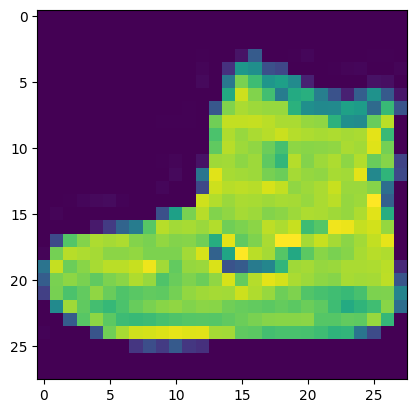

In [141]:
plt.figure()
plt.imshow(train_x[0])

In [142]:
#normalize and flatten
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x = train_x.reshape(-1, 784)
test_x = test_x.reshape(-1, 784)

In [143]:
#data augmentation
# Reshape train_x to image format (28x28 pixels, 1 channel for grayscale) before augmentation
train_x_reshaped = train_x.reshape(-1, 28, 28, 1)

datagen = ImageDataGenerator(rotation_range=27, width_shift_range=0.2, height_shift_range=0.2,horizontal_flip=True,brightness_range=(0.5,1.5),zoom_range=0.2)
train_aug = datagen.flow(train_x_reshaped, train_y)

In [151]:
#build and compile the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [152]:
#compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [153]:
model.fit(train_x, train_y, epochs=25)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7500 - loss: 0.7105
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8449 - loss: 0.4239
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8616 - loss: 0.3836
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8651 - loss: 0.3694
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8709 - loss: 0.3495
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8761 - loss: 0.3360
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8799 - loss: 0.3231
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8816 - loss: 0.3191
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8828 - loss: 0.3171
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8842 - loss: 0.3113
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8884 - loss: 0.3017
Epoch 12/25
1875/1875 ━━━━

In [154]:
#evaluate the model
test_loss, test_accuracy = model.evaluate(test_x, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8840 - loss: 0.3433


In [150]:
#evaluate the model
# Reshape test_x to image format (28x28 pixels, 1 channel for grayscale) before evaluation
test_x_reshaped = test_x.reshape(-1, 28, 28, 1)

test_loss, test_accuracy = model.evaluate(test_x_reshaped, test_y)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1886 - loss: 184.7789
Test Loss: 188.14210510253906
Test Accuracy: 0.1817999929189682


In [157]:
predicted_y = model.predict(test_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [158]:
for i in range(0,10):
    print(f"Predicted: {np.argmax(predicted_y[i])}, Actual: {test_y[i]}")

Predicted: 9, Actual: 9
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 6, Actual: 6
Predicted: 1, Actual: 1
Predicted: 4, Actual: 4
Predicted: 6, Actual: 6
Predicted: 5, Actual: 5
Predicted: 7, Actual: 7


In [161]:
con_matrix = confusion_matrix(test_y, np.argmax(predicted_y, axis=1))
print(con_matrix)

[[807   1  13  17   3   1 153   0   5   0]
 [  4 960   2  27   3   0   4   0   0   0]
 [ 16   1 801  14  91   0  76   0   1   0]
 [ 13   3   7 921  19   0  34   0   3   0]
 [  1   0 104  41 783   0  70   0   1   0]
 [  0   0   0   1   0 970   0  13   1  15]
 [ 90   0  77  36  59   0 726   0  12   0]
 [  0   0   0   0   0  19   0 955   0  26]
 [  3   0   3   4   3   2   5   4 976   0]
 [  1   0   0   0   0   5   0  36   0 958]]


Predicted Class: 9
Actual Class: 9


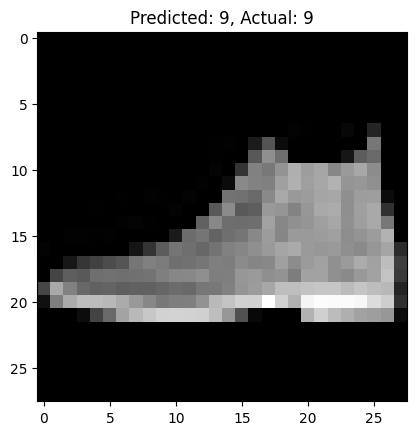

In [163]:
# Visualize a test image and its prediction
index_to_show = 0 # Index of the test image to display

# Reshape the flattened test image back to 28x28 for plotting
test_image = test_x[index_to_show].reshape(28, 28)

print(f"Predicted Class: {np.argmax(predicted_y[index_to_show])}")
print(f"Actual Class: {test_y[index_to_show]}")

plt.figure()
plt.imshow(test_image, cmap='gray') # Use cmap='gray' for grayscale images
plt.title(f"Predicted: {np.argmax(predicted_y[index_to_show])}, Actual: {test_y[index_to_show]}")
plt.show()